In [45]:
!pip install googletrans

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 55 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 908 kB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.5 MB/s  eta 0:00:01
     |████████████████████████████████| 53 kB 2.4 MB/s  eta 0:00:01
     |████████████████████████████████| 65 kB 3.6 MB/s  eta 0:00:01
     |████████████████████████████████| 98 kB 7.5 MB/s  eta 0:00:01
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15740 sha256=c8a69a8aaa4dcf24d4af9e6f39c72ded80fbab88d10da2df05773350b92d4a5c
  Stored in directory: /home/stanislav/.cache/pip/wheels/06/a1/90/75375ea9aff253a4803b2356007f64aecb6ce2f1e46a0aa9ba
  Created wheel for contextvars: filename=contextvars-2.4-py3-none-any.whl size=3510 sha256=c4deca757da084bc30693c2f04d44e7469e40999d9812e0c1c1864e81525ab67
  Stored in directory: /home/stanislav/.cache/pip/wheels/41/11/53/911724983aa48de

In [5]:
from bs4 import BeautifulSoup
import requests
from fake_useragent import UserAgent
import time
from tqdm import tqdm_notebook
from googletrans import Translator
# import vk


In [6]:
ua = UserAgent()

In [14]:
ua.chrome

'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1500.55 Safari/537.36'

In [15]:
headers = {
    'User-Agent': ua.chrome
}

In [16]:
res = requests.get('https://www.mirror.co.uk/sport/football/news/', headers=headers)

In [19]:
bs = BeautifulSoup(res.text, 'lxml')

In [20]:
teasers = bs.findAll("div", {"class": "teaser"})

In [42]:
data = []
for teaser in tqdm_notebook(teasers[:5]):
    a = teaser.find('figure').find('a', href=True)
    img = a.find('img')['data-src']
    if 'https://' not in img:
        continue
    link_news = a['href']
    if '/sport/football/' not in link_news:
        continue
    text_teaser = a['aria-label']

    rs = requests.get(link_news, headers=headers)
    soup = BeautifulSoup(rs.text, 'lxml')
    full_text = soup.find('p', {'class': 'sub-title'}).contents[0]
    t = dict(
        teaser=text_teaser,
        text=full_text,
        link=link_news,
        img=img,
    )
    data.append(t)
    time.sleep(10)

HBox(children=(IntProgress(value=0, max=5), HTML(value='')))

In [55]:
import os

In [56]:
os.path.splitext('http://sdfsdf.com/sdfsdf.jpg')

('http://sdfsdf.com/sdfsdf', '.jpg')

In [43]:
data

[{'img': 'https://i2-prod.mirror.co.uk/incoming/article22271684.ece/ALTERNATES/s615/0_Aston-Villa-v-Wolverhampton-Wanderers-Premier-League.jpg',
  'link': 'https://www.mirror.co.uk/sport/football/news/aston-villas-survival-bid-takes-22282538',
  'teaser': "Aston Villa's survival bid suffers big blow with Matt Targett injury news",
  'text': "Former Southampton full-back Targett was forced off in Saturday's home defeat against Wolves"},
 {'img': 'https://i2-prod.mirror.co.uk/incoming/article22247022.ece/ALTERNATES/s615/0_FBL-ENG-PR-BRIGHTON-ARSENAL.jpg',
  'link': 'https://www.mirror.co.uk/sport/football/news/arsenal-to-announce-new-long-22282494',
  'teaser': "Arsenal 'to announce new long-term Bukayo Saka contract this week'",
  'text': "Arsenal boss Mikel Arteta has been desperate to secure the future of youngster Bukayo Saka - and it seems an announcement on the player's future is imminent"},
 {'img': 'https://i2-prod.mirror.co.uk/incoming/article20058005.ece/ALTERNATES/s615/0_Arsen

In [48]:
tr = Translator(user_agent=ua.opera)

In [53]:
res = tr.translate(data[0]['text'], dest='ru', src='en')

In [54]:
res.text

'Бывший защитник Саутгемптона Targett был вынужден в субботу домашнее поражение от волков'

In [23]:
session = vk.AuthSession(app_id=7527111, user_login='staz12345@list.ru', user_password='annaisthebest29',
                        scope='wall,photos')


ProxyError: HTTPSConnectionPool(host='m.vk.com', port=443): Max retries exceeded with url: / (Caused by ProxyError('Cannot connect to proxy.', OSError('Tunnel connection failed: 407 Proxy Authentication Required ( Forefront TMG requires authorization to fulfill the request. Access to the Web Proxy filter is denied.  )')))

In [20]:
api = vk.API(session)

In [21]:
api.photos.getWallUploadServer(group_id=196777471, v=5.21)

ProxyError: HTTPSConnectionPool(host='api.vk.com', port=443): Max retries exceeded with url: /method/photos.getWallUploadServer (Caused by ProxyError('Cannot connect to proxy.', OSError('Tunnel connection failed: 407 Proxy Authentication Required ( Forefront TMG requires authorization to fulfill the request. Access to the Web Proxy filter is denied.  )')))

In [22]:
session.access_token

'f46772a656cd766e89bacc653971056750f50978e569a8319154072f2cbb8b454b9028b8e12a62c50e7d7'

In [189]:
!pip install --upgrade lxml

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 5.5 MB 1.9 MB/s eta 0:00:01


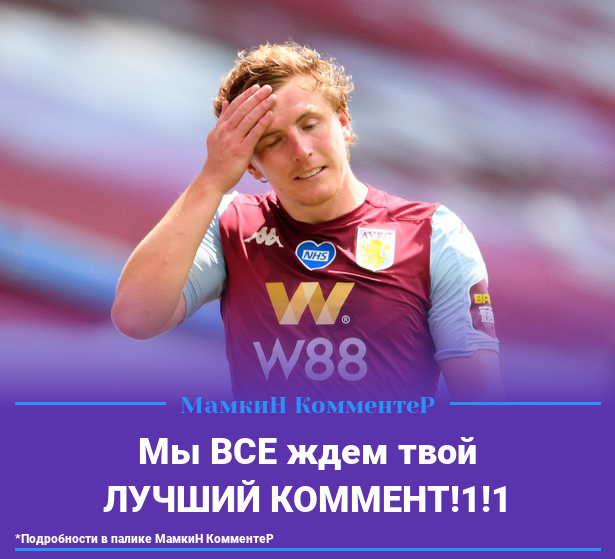

In [414]:
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO
from urllib.request import urlopen
import textwrap
import os
import requests
import math

TINT_COLOR = '#5b33ac'  # Black
TRANSPARENCY = .8  # Degree of transparency, 0-100%
OPACITY = int(255 * TRANSPARENCY)

url = "https://i2-prod.mirror.co.uk/incoming/article22271684.ece/ALTERNATES/s615/0_Aston-Villa-v-Wolverhampton-Wanderers-Premier-League.jpg"

_, ext = os.path.splitext(url)
img_data = requests.get(url, headers = {
    'User-Agent': ua.chrome
}).content
file_name = f'sample.png'
with open(file_name, 'wb') as handler:
    handler.write(img_data)

img = Image.open(file_name)
img = img.convert("RGBA")
im = img

def apply_black_gradient(path_in, path_out='out.png',
                         gradient=3., initial_opacity=1.):
    img = Image.open(file_name)
    img = img.convert("RGBA")
    # get image to operate on
    input_im = Image.open(path_in)
    if input_im.mode != 'RGBA':
        input_im = input_im.convert('RGBA')
    width, height = input_im.size

    # create a gradient that
    # starts at full opacity * initial_value
    # decrements opacity by gradient * x / width
    alpha_gradient = Image.new('L', (1, height), color=0xFF)
    for x, x1 in zip(range(height)[::-1], range(height)):
        a = int((initial_opacity * 255.) * (1. - gradient * float(x)/height))
        if a > 0:
            alpha_gradient.putpixel((0, x1), a)
        else:
            alpha_gradient.putpixel((0, x1), 0)
#         print('{}, {:.2f}, {}'.format(x, float(x) / height, a))
    alpha = alpha_gradient.resize(input_im.size)

    # create black image, apply gradient
    black_im = Image.new('RGBA', (width, height), color=TINT_COLOR) # i.e. black
    black_im.putalpha(alpha)

    # make composite with original image
    output_im = Image.alpha_composite(input_im, black_im)
    
    overlay = Image.new('RGBA', (img.size[0], img.size[1] + 150), TINT_COLOR)
    overlay.paste(output_im, (0, 0))
    
    img = overlay
    
    fnt = ImageFont.truetype('fonts/Roboto-Black.ttf', int(img.size[0] * 0.06))
    fnt_mir = ImageFont.truetype('fonts/YesevaOne-Regular.ttf', int(img.size[0] * 0.04))
    fnt_info = ImageFont.truetype('fonts/Roboto-Black.ttf', int(img.size[0] * 0.02))
    
    text = "Мы ВСЕ ждем твой ЛУЧШИЙ КОММЕНТ!1!1"
    br = len(text) / 2
    para = textwrap.wrap(text, width=int(math.ceil(br / 10.0)) * 10)

    current_h, pad = img.size[1] - img.size[1] * 0.23, 8

    d = ImageDraw.Draw(img)
    for line in para:
        w, h = d.textsize(line, font=fnt)
        d.text(((img.size[0] - w) / 2, current_h), line, font=fnt, fill=(255, 255, 255))
        current_h += h + pad

    source = 'МамкиН КомментеР'
    w, h = d.textsize(source, font=fnt_mir)
    txt_height = img.size[1] * 0.7
    d.text(((img.size[0] - w) / 2, txt_height), source, font=fnt_mir, fill='#2B92F5')
    
    d.text((15, img.size[1] * 0.95), '*Подробности в палике МамкиН КомментеР', font=fnt_info, fill='white')
    
    top = (15, txt_height * 1.03)
    x = ((width - w) // 2) - 15
    left = (x, txt_height * 1.03)
    
    x1= x + w + 30
    top1 = (x1, txt_height * 1.03)
    left1 = (width - 15, txt_height * 1.03)
    
    top2 = (15, img.size[1] - 10)
    left2 = (width - 15, img.size[1] - 10)
    
    
    d.line([top, left], fill='#2B92F5', width=3)
    d.line([top1, left1], fill='#2B92F5', width=3)
    d.line([top2, left2], fill='#2B92F5', width=3)
    
    img.save(file_name)
    
    
    img.save(path_out, 'PNG')

    return

apply_black_gradient(file_name)
# Determine extent of the largest possible square centered on the image.
# and the image's shorter dimension.
# llx, lly = 0, img.size[1] - img.size[1] * 0.25

# # Calculate upper point + 1 because second point needs to be just outside the
# # drawn rectangle when drawing rectangles.
# urx, ury = llx+img.size[0], lly+img.size[1] * 0.25

# # Make a blank image the same size as the image for the rectangle, initialized
# # to a fully transparent (0% opaque) version of the tint color, then draw a
# # semi-transparent version of the square on it.
# overlay = Image.new('RGBA', img.size, TINT_COLOR+(0,))
# draw = ImageDraw.Draw(overlay)  # Create a context for drawing things on it.
# draw.rectangle(((llx, lly), (urx, ury)), fill=TINT_COLOR+(OPACITY,))

# fnt = ImageFont.truetype('/Library/Fonts/Arial.ttf', int(img.size[0] * 0.035))

# fnt_mir = ImageFont.truetype('/Library/Fonts/Arial.ttf', int(img.size[0] * 0.06))

# # Alpha composite these two images together to obtain the desired result.
# img = Image.alpha_composite(img, overlay)
# img = img.convert("RGB") # Remove alpha for saving in jpg format.



# para = textwrap.wrap("Aston Villa's survival bid suffers big blow with Matt Targett injury news", 
#                      width=60)

# current_h, pad = img.size[1] - img.size[1] * 0.15, 8

# d = ImageDraw.Draw(img)
# for line in para:
#     w, h = d.textsize(line, font=fnt)
#     d.text(((img.size[0] - w) / 2, current_h), line, font=fnt, fill=(255, 255, 255))
#     current_h += h + pad
    
# #     d.text(( * 0.05, img.size[1] - img.size[1] * 0.15), 
# #        , 
# #        font=fnt, fill=(255, 255, 255))

# source = 'Mirror'
# w, h = d.textsize(source, font=fnt_mir)
# d.text(((img.size[0] - w) / 2, img.size[1] * 0.74), source, font=fnt_mir, fill=(255, 255, 255))

# img.save(file_name)

from IPython.display import Image
Image(filename='out.png')

In [112]:
!ls

Classes       img		Mappers       stats.id
constants.py  index.py		mem_const.py  trial.ipynb
fonts	      leader_board.png	__pycache__   vk_config.v2.json


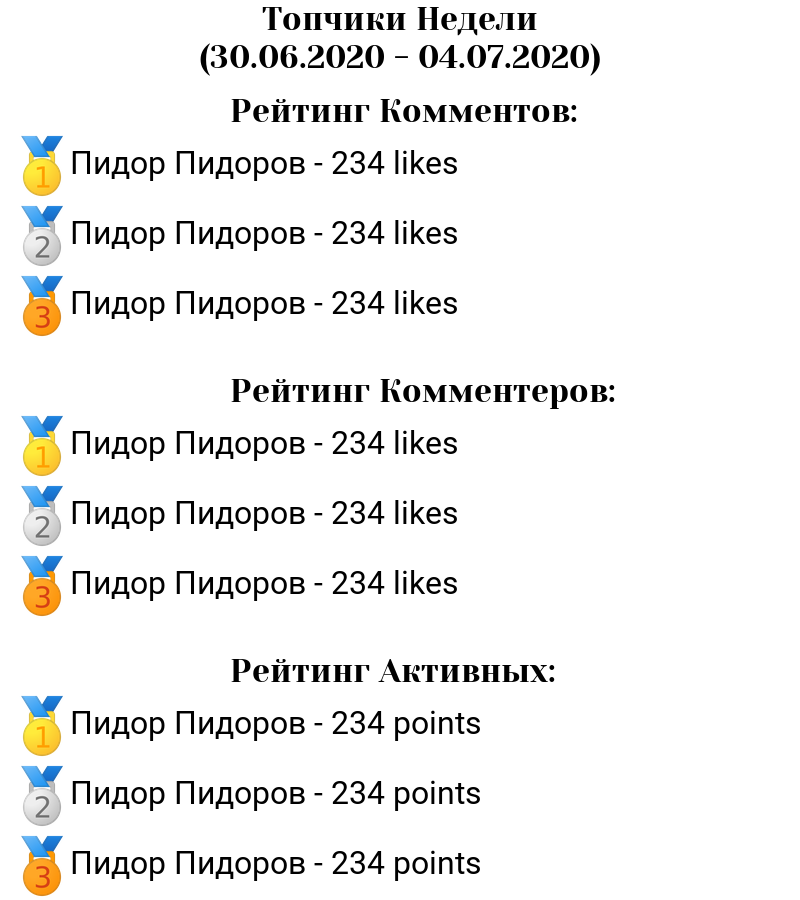

In [226]:
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO
from urllib.request import urlopen
import textwrap
import os
import requests
import math
import emoji

path_file = 'leader_board.png'
width, height = 800, 900
thumb = 64, 64
fnt = ImageFont.truetype('fonts/YesevaOne-Regular.ttf', int(img.size[0] * 0.04))
fnt_point = ImageFont.truetype('fonts/Roboto-Regular.ttf', int(img.size[0] * 0.04))

img = Image.new('RGBA', (width, height), color='white')
d = ImageDraw.Draw(img)

header = 'Топчики Недели'
date = '(30.06.2020 - 04.07.2020)'
w, h = d.textsize(header, font=fnt)
txt_height = img.size[1] * 0.001
d.text(((img.size[0] - w) / 2, txt_height), header, font=fnt, fill='black')

w, h = d.textsize(date, font=fnt)
d.text(((img.size[0] - w) / 2, h + txt_height), date, font=fnt, fill='black')

# d.text((15, img.size[1] * 0.8), '*Подробности в палике МамкиН КомментеР', font=fnt, fill='white')
first_place = Image.open('img/icons/1st_place.png')
first_place = first_place.convert("RGBA")
first_place.thumbnail(thumb, Image.ANTIALIAS)

second_place = Image.open('img/icons/2st_place.png')
second_place = second_place.convert("RGBA")
second_place.thumbnail(thumb, Image.ANTIALIAS)

third_place = Image.open('img/icons/3rd_place.png')
third_place = third_place.convert("RGBA")
third_place.thumbnail(thumb, Image.ANTIALIAS)

f_h = 50
margin_top = int(img.size[0] * 0.08)
d.text((230, margin_top + 70 * 0.4), 'Рейтинг Комментов:', font=fnt, fill='black')
img.alpha_composite(first_place, (10, margin_top + 70))
d.text((70, margin_top + 80), 'Пидор Пидоров - 234 likes', font=fnt_point, fill='black')
img.alpha_composite(second_place, (10, margin_top + 70 * 2))
d.text((70, margin_top + 70 * 2 + 10), 'Пидор Пидоров - 234 likes', font=fnt_point, fill='black')
img.alpha_composite(third_place, (10, margin_top + 70 * 3))
d.text((70, margin_top + 70 * 3 + 10), 'Пидор Пидоров - 234 likes', font=fnt_point, fill='black')

d.text((230, margin_top + 70 * 4.4), 'Рейтинг Комментеров:', font=fnt, fill='black')
img.alpha_composite(first_place, (10, margin_top + 70 * 5))
d.text((70, margin_top + 70 * 5 + 10), 'Пидор Пидоров - 234 likes', font=fnt_point, fill='black')
img.alpha_composite(second_place, (10, margin_top + 70 * 6))
d.text((70, margin_top + 70 * 6 + 10), 'Пидор Пидоров - 234 likes', font=fnt_point, fill='black')
img.alpha_composite(third_place, (10, margin_top + 70 * 7))
d.text((70, margin_top + 70 * 7 + 10), 'Пидор Пидоров - 234 likes', font=fnt_point, fill='black')

d.text((230, margin_top + 70 * 8.4), 'Рейтинг Активных:', font=fnt, fill='black')
img.alpha_composite(first_place, (10, margin_top + 70 * 9))
d.text((70, margin_top + 70 * 9 + 10), 'Пидор Пидоров - 234 points', font=fnt_point, fill='black')
img.alpha_composite(second_place, (10, margin_top + 70 * 10))
d.text((70, margin_top + 70 * 10 + 10), 'Пидор Пидоров - 234 points', font=fnt_point, fill='black')
img.alpha_composite(third_place, (10, margin_top + 70 * 11))
d.text((70, margin_top + 70 * 11 + 10), 'Пидор Пидоров - 234 points', font=fnt_point, fill='black')

img.save(path_file, 'PNG')


from IPython.display import Image
Image(filename=path_file)

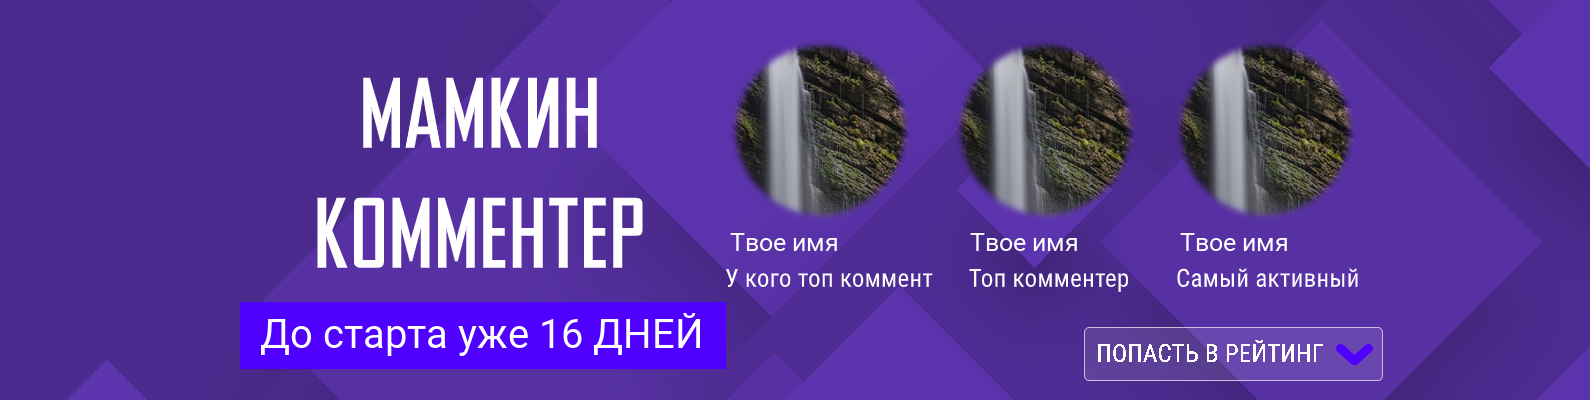

In [328]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter
from io import BytesIO
from urllib.request import urlopen
import textwrap
import os
import requests
import math
import emoji
from datetime import date, timedelta

def plural_days(n):
    days = ['день', 'дня', 'дней']
    
    if n % 10 == 1 and n % 100 != 11:
        p = 0
    elif 2 <= n % 10 <= 4 and (n % 100 < 10 or n % 100 >= 20):
        p = 1
    else:
        p = 2

    return str(n) + ' ' + days[p]


start_date = date(year=2020, month=7, day=27)
days_left = plural_days(-(date.today() - start_date).days)
path_file = 'layouts/cover_web_edit.png'
file_open = 'layouts/cover_web_1.png'

thumbnail_path = 'img/thumbnail.png'

img = Image.open(file_open)
img = img.convert("RGBA")
thumb_width = 180

fnt = ImageFont.truetype('fonts/Roboto-Regular.ttf', 25)
fnt_days = ImageFont.truetype('fonts/Roboto-Regular.ttf', 40)

paste_img = Image.open('img/sample.png')

def crop_center(pil_img, crop_width, crop_height):
    img_width, img_height = pil_img.size
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

im_thumb = crop_center(paste_img, thumb_width, thumb_width)

def mask_circle_transparent(pil_img, blur_radius, offset=0):
    offset = blur_radius * 2 + offset
    mask = Image.new("L", pil_img.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((offset, offset, pil_img.size[0] - offset, pil_img.size[1] - offset), fill=255)
    mask = mask.filter(ImageFilter.GaussianBlur(blur_radius))

    result = pil_img.copy()
    result.putalpha(mask)

    return result

is_test = True

d = ImageDraw.Draw(img)

d.text((260, 310), f'До старта уже {days_left.upper()}', font=fnt_days, fill='white')

# im_square = im_thumb.resize((thumb_width, thumb_width), Image.LANCZOS)
im_thumbs = [mask_circle_transparent(im_thumb, 3) for i in range(3)]
names = ['Твое имя' if is_test else 'Имя фамилия' for i in range(3)]

img.alpha_composite(im_thumbs[0], (730, 40))
d.text((730, 227), names[0], font=fnt, fill='white')

img.alpha_composite(im_thumbs[1], (955, 40))
d.text((970, 227), names[1], font=fnt, fill='white')

img.alpha_composite(im_thumbs[2], (1175, 40))
d.text((1180, 227), names[2], font=fnt, fill='white')

img.save(path_file)

from IPython.display import Image
Image(filename=path_file)

In [228]:
!ls img

icons  leader_board.png  out.png  rating.png  sample.png


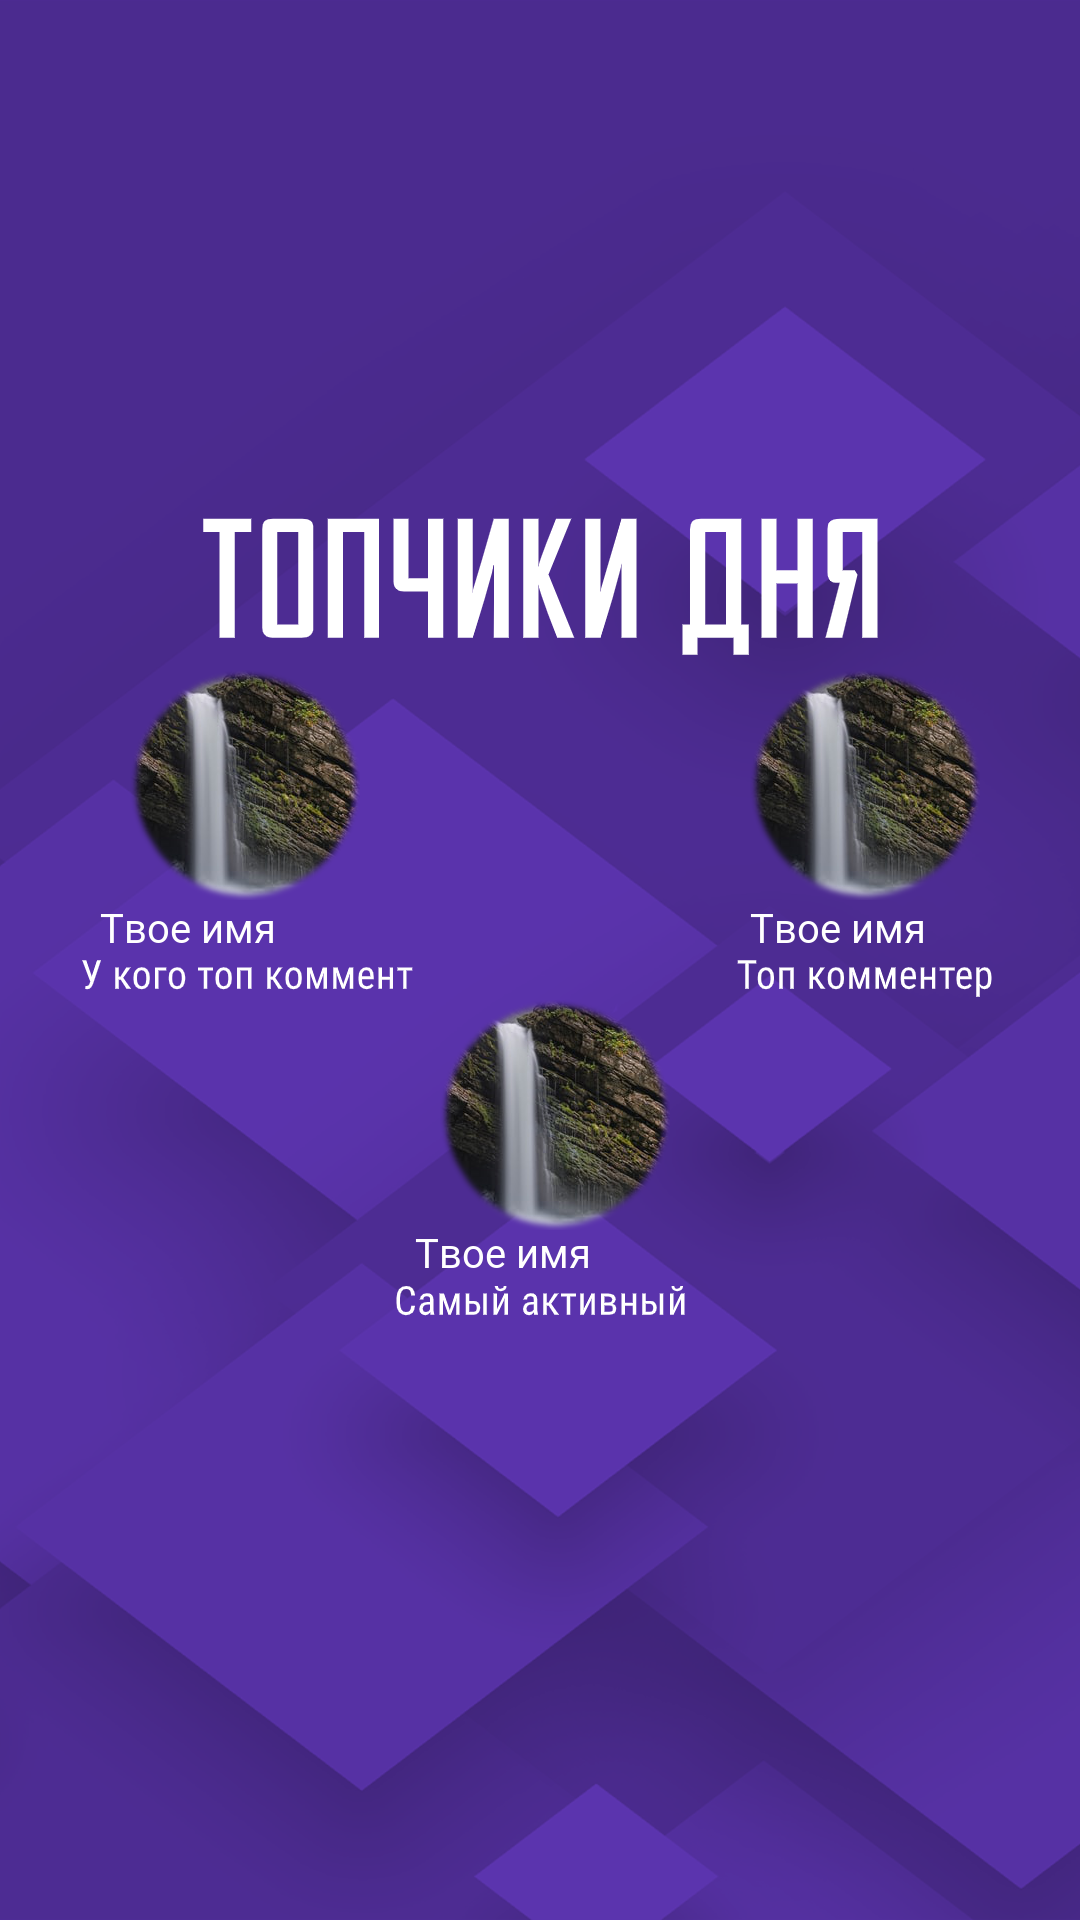

In [375]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter
from io import BytesIO
from urllib.request import urlopen
import textwrap
import os
import requests
import math
import emoji
from datetime import date, timedelta

path_file = 'layouts/mobile/cover_mob_1_edit.png'
file_open = 'layouts/mobile/cover_mob_1.png'

img = Image.open(file_open)
img = img.convert("RGBA")
thumb_width = 230

fnt = ImageFont.truetype('fonts/Roboto-Regular.ttf', 40)
fnt_days = ImageFont.truetype('fonts/Roboto-Regular.ttf', 40)

paste_img = Image.open('img/sample.png')

im_thumb = crop_center(paste_img, thumb_width, thumb_width)

im_thumbs = [mask_circle_transparent(im_thumb, 3) for i in range(3)]
names = ['Твое имя' if is_test else 'Имя фамилия' for i in range(3)]

d = ImageDraw.Draw(img)

img.alpha_composite(im_thumbs[0], (130, 670))
d.text((100, 905), names[0], font=fnt, fill='white')

img.alpha_composite(im_thumbs[1], (750, 670))
d.text((750, 905), names[1], font=fnt, fill='white')

img.alpha_composite(im_thumbs[2], (440, 1000))
d.text((415, 1230), names[2], font=fnt, fill='white')

img.save(path_file)

from IPython.display import Image
Image(filename=path_file)

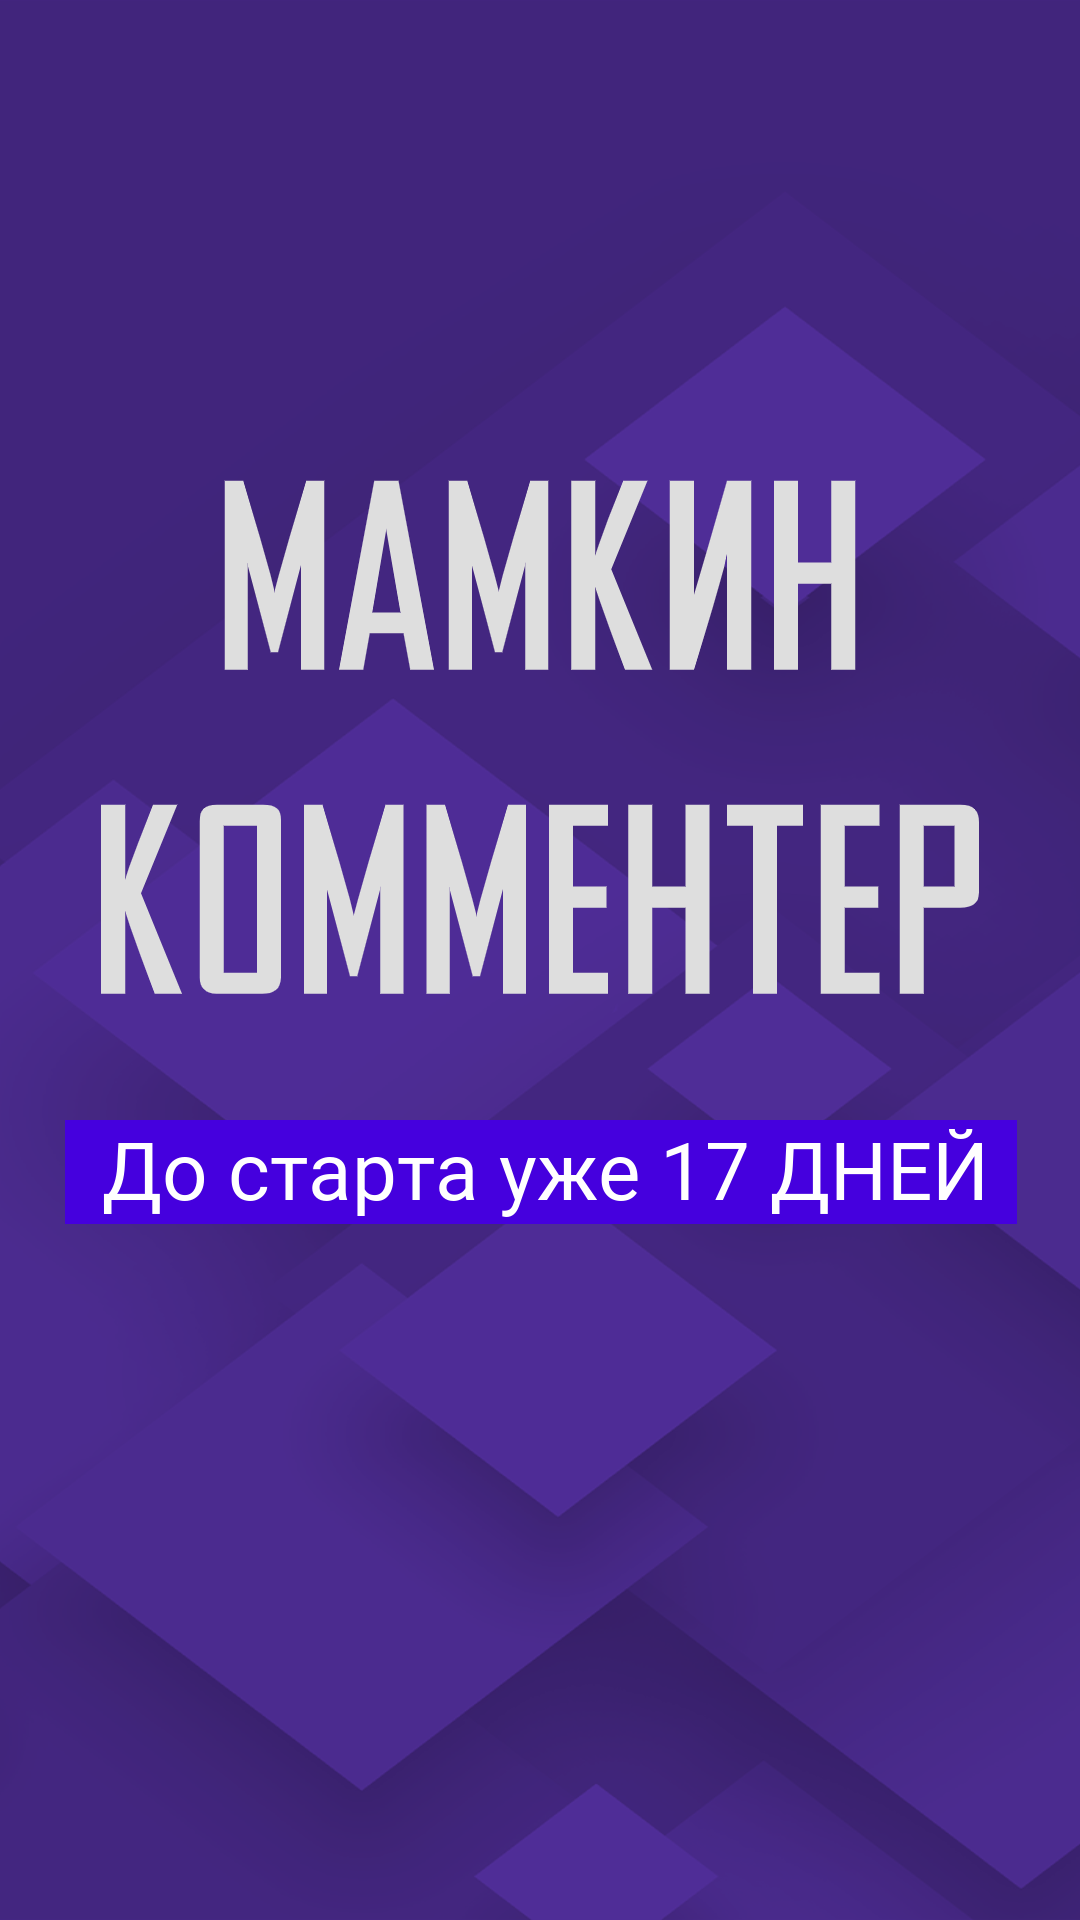

In [385]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter
from io import BytesIO
from urllib.request import urlopen
import textwrap
import os
import requests
import math
import emoji
from datetime import date, timedelta

path_file = 'layouts/mobile/layout_mob_edit.png'
file_open = 'layouts/mobile/layout_mob.png'

img = Image.open(file_open)
img = img.convert("RGBA")

fnt = ImageFont.truetype('fonts/Roboto-Regular.ttf', 80)
cover_phrase = f'До старта уже 17 ДНЕЙ'
d = ImageDraw.Draw(img)
d.text((102, 1125), cover_phrase, font=fnt, fill='white')
    
img.save(path_file)

from IPython.display import Image
Image(filename=path_file)

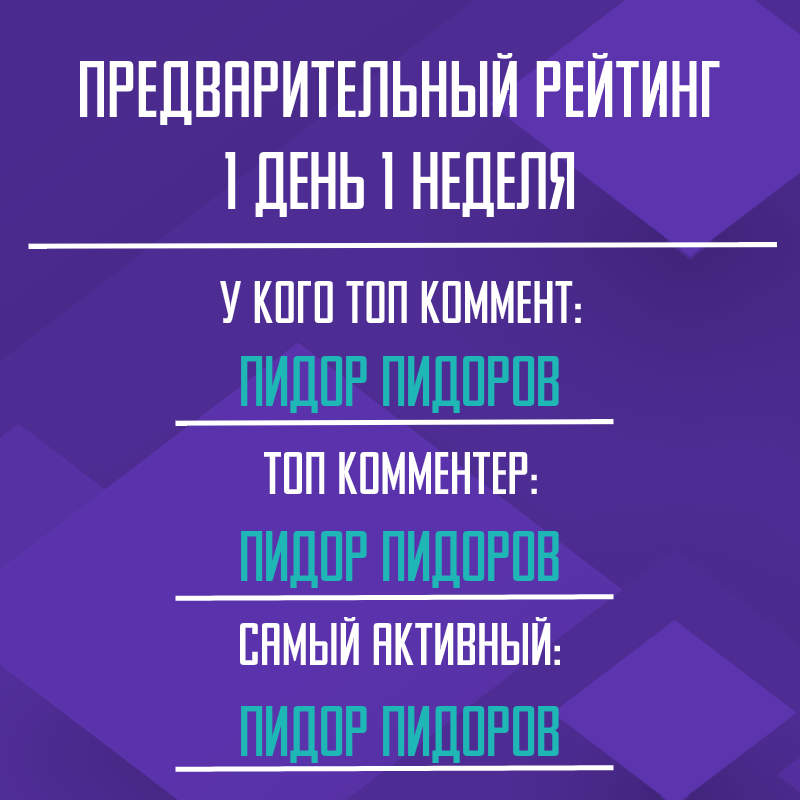

In [408]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter
from io import BytesIO
from urllib.request import urlopen
import textwrap
import os
import requests
import math
import emoji
from datetime import date, timedelta

path_file = 'layouts/rating/rating_layout_edit.png'
file_open = 'layouts/rating/rating_layout.png'

img = Image.open(file_open)
img = img.convert("RGBA")

fnt = ImageFont.truetype('fonts/Agency_Gothic.otf', 80)
fnt_name = ImageFont.truetype('fonts/Agency_Gothic.otf', 70)

cover_phrase = f'1 день 1 неделя'

d = ImageDraw.Draw(img)
w, h = d.textsize(cover_phrase, font=fnt)
d.text(((img.size[0] - w) / 2, 145), cover_phrase, font=fnt, fill='white')

names = ['пидор пидоров' for i in range(3)]

for name, height in zip(names, range(350, 800, 175)):
    w, h = d.textsize(name, font=fnt_name)
    d.text(((img.size[0] - w) / 2, height), name, font=fnt_name, fill='#1fb6b6')
    
img.save(path_file)

from IPython.display import Image
Image(filename=path_file)